In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [2]:
#loading all dataset

calendar=pd.read_csv(r"C:\Users\patil\Downloads\calendar.csv")
host=pd.read_csv(r"C:\Users\patil\Downloads\hosts.csv")
reviews=pd.read_csv(r"C:\Users\patil\Downloads\reviews.csv")
listings=pd.read_csv(r"C:\Users\patil\Downloads\listings.csv")

In [3]:
calendar

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125
...,...,...,...,...,...,...,...,...
319187,319188,52729945,2022-07-06 00:00:00.000000,1,64.0,64.0,1,10
319188,319189,36953202,2022-07-08 00:00:00.000000,0,140.0,140.0,3,1125
319189,319190,39580214,2022-06-13 00:00:00.000000,1,49.0,49.0,1,13
319190,319191,49016014,2022-10-26 00:00:00.000000,0,60.0,60.0,2,30


In [4]:
calendar['date']=calendar['date'].str[0:10]

In [5]:
# Count the number of rows
num_rows = len(calendar)

# Count the number of unique listing ids
num_unique_listing_ids = calendar['listing_id'].nunique()

print("Number of Rows:", num_rows)
print("Number of Unique Listing IDs:", num_unique_listing_ids)


Number of Rows: 319192
Number of Unique Listing IDs: 1749


In [6]:
calendar

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03,0,56.0,56.0,3,5
1,2,22742449,2022-11-13,1,95.0,95.0,2,99
2,3,34621717,2022-04-17,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21,0,100.0,100.0,2,1125
...,...,...,...,...,...,...,...,...
319187,319188,52729945,2022-07-06,1,64.0,64.0,1,10
319188,319189,36953202,2022-07-08,0,140.0,140.0,3,1125
319189,319190,39580214,2022-06-13,1,49.0,49.0,1,13
319190,319191,49016014,2022-10-26,0,60.0,60.0,2,30


In [7]:
### we have removed the timestamp as it doesn't consists of any important data

In [8]:
# Checking for Null values
calendar.isna().sum()

calender_id        0
listing_id         0
date               0
available          0
price             75
adjusted_price    75
minimum_nights     0
maximum_nights     0
dtype: int64

In [9]:
# 75 data points are Null, we shall use .describe() to check for outliers using box plot
calendar[["price"]].describe()

,price
count,319117.000000
mean,109.917779
std,185.791168
min,13.000000
25%,59.000000
50%,79.000000
75%,115.000000
max,5800.000000


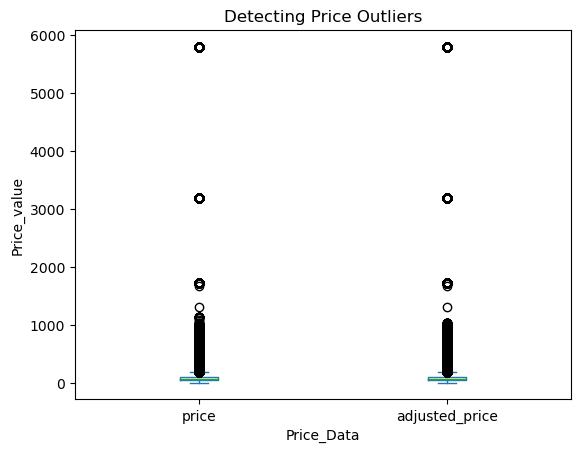

In [10]:
# As Std > Mean, it indicates abnormal distribution of data and higher variation between values
# Detecting outliers using Box plot (using pandas for box plot)
calendar[['price', 'adjusted_price']].plot(kind='box')
plt.ylabel('Price_value')
plt.xlabel('Price_Data')
plt.title('Detecting Price Outliers')
plt.show()

In [11]:
# Due to outliers, we need to fill-in null values using median in price columns

In [12]:
calendar['price'].fillna(calendar['price'].median(),inplace=True)
calendar['adjusted_price'].fillna(calendar['adjusted_price'].median(),inplace=True)

In [13]:
# Removing the outliers from price and adjusted price column

# Calculate quartiles and IQR
Q1 = calendar['price'].quantile(0.25)
Q3 = calendar['price'].quantile(0.75)
IQR = Q3 - Q1

# Define threshold for outliers
threshold = 1.5

# Find outliers
outliers = calendar[(calendar['price'] < Q1 - threshold * IQR) |(calendar['price'] > Q3 + threshold * IQR)]

print(outliers)


        calender_id  listing_id        date  available   price  \
7                 8    36963744  2022-11-30          0  1000.0   
11               12    31130575  2022-09-04          1   240.0   
16               17    41703665  2022-11-02          0   200.0   
23               24    48193498  2022-04-28          0   300.0   
25               26    27479453  2022-09-18          0   250.0   
...             ...         ...         ...        ...     ...   
319122       319123    53355067  2022-08-11          1   650.0   
319150       319151    39482529  2022-12-10          0   520.0   
319166       319167    23364073  2022-10-07          1   343.0   
319174       319175    49046146  2022-02-13          1   280.0   
319181       319182    35206126  2022-03-14          1   220.0   

        adjusted_price  minimum_nights  maximum_nights  
7               1000.0               1             999  
11               240.0               2            1125  
16               200.0              

In [14]:
calendar = calendar.drop(outliers.index)
calendar

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03,0,56.0,56.0,3,5
1,2,22742449,2022-11-13,1,95.0,95.0,2,99
2,3,34621717,2022-04-17,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21,0,100.0,100.0,2,1125
...,...,...,...,...,...,...,...,...
319187,319188,52729945,2022-07-06,1,64.0,64.0,1,10
319188,319189,36953202,2022-07-08,0,140.0,140.0,3,1125
319189,319190,39580214,2022-06-13,1,49.0,49.0,1,13
319190,319191,49016014,2022-10-26,0,60.0,60.0,2,30


In [15]:
# Let's check for null values

calendar.isna().sum()

calender_id       0
listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [16]:
# Let's check for duplicate values

duplicate_values=calendar[calendar.duplicated()]
duplicate_values

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights


In [17]:
#viewing host dataset
host

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...
...,...,...,...,...,...
1106,434049804,Mathias,2021-11-30 00:00:00.000000,BE,NaN
1107,435722877,Tatjana,2021-12-12 00:00:00.000000,BE,NaN
1108,435999398,Flor,2021-12-14 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
1109,436739371,Naser,2021-12-20 00:00:00.000000,BE,NaN


In [18]:
host['host_since']=host['host_since'].str[0:10]

In [19]:
host

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...
...,...,...,...,...,...
1106,434049804,Mathias,2021-11-30,BE,NaN
1107,435722877,Tatjana,2021-12-12,BE,NaN
1108,435999398,Flor,2021-12-14,"Antwerp, Flanders, Belgium",NaN
1109,436739371,Naser,2021-12-20,BE,NaN


In [20]:
#null value check
host.isna().sum()

host_id            0
host_name          0
host_since         0
host_location      3
host_about       621
dtype: int64

In [21]:
# let's drop host_about column as not neccessary for our analysis 

host=host.drop(['host_about'],axis=1)

In [22]:
# Imputing the null values with Mode
host['host_location'].fillna(host['host_location'].mode()[0],inplace=True)

In [23]:
host.isna().sum()

host_id          0
host_name        0
host_since       0
host_location    0
dtype: int64

In [24]:
host[host.duplicated()]


,host_id,host_name,host_since,host_location


In [25]:
#now loading listings table
listings

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,53916524,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,Industrial loft (110m²) with a relaxing urban ...,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,1.0,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712
1745,53928545,https://www.airbnb.com/rooms/53928545,Studio in het midden van Antwerpen,Recent gerenoveerde rustige studio van circa 2...,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936
1746,53929354,https://www.airbnb.com/rooms/53929354,Mooi appartement met open haard,Vanuit deze ideaal gelegen accommodatie kun je...,51.200340,4.421060,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Kitchen"", ""Smoke alarm"", ""Outdoor furniture""...",334036639
1747,53949105,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,"Kasteel Boterlaerhof ligt ideaal gelegen, op 1...",51.212320,4.482230,Castle,Entire home/apt,16,7.5 baths,7.0,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714


In [26]:
listings.isna().sum()

listing_id          0
listing_url         0
name                0
description        70
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms          128
beds               41
amenities           0
host_id             0
dtype: int64

In [27]:
# Let's drop description, name, listing_url columns as they are unneccessary for data analysis

listings=listings.drop(listings[["description","name","listing_url"]],axis=1)


In [28]:
listings.isna().sum()

listing_id          0
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms          128
beds               41
amenities           0
host_id             0
dtype: int64

In [29]:
listings[["bedrooms","beds"]].describe()

,bedrooms,beds
count,1621.000000,1708.000000
mean,1.529303,2.220726
std,1.091453,2.227509
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,20.000000,44.000000


<Axes: >

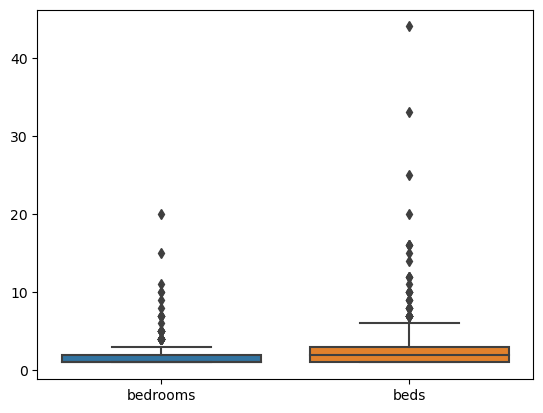

In [30]:
# Now ploting Box plot using Seaborn to check the outliers
sns.boxplot(data=listings[["bedrooms","beds"]])

In [31]:
# Let's impute the null values with Median

listings['bedrooms'].fillna(listings['bedrooms'].median(),inplace=True)
listings['beds'].fillna(listings['beds'].median(),inplace=True)

In [32]:
listings.dtypes

listing_id          int64
latitude          float64
longitude         float64
property_type      object
room_type          object
accomodates         int64
bathrooms_text     object
bedrooms          float64
beds              float64
amenities          object
host_id             int64
dtype: object

In [33]:
listings['bathrooms_text']

0       1 private bath
1            2.5 baths
2               1 bath
3       2 shared baths
4               1 bath
             ...      
1744         1.5 baths
1745            1 bath
1746            1 bath
1747         7.5 baths
1748         1.5 baths
Name: bathrooms_text, Length: 1749, dtype: object

In [34]:
listings[['Number_of_bathrooms',"Type_of_Bathrooms","Bath"]]= listings['bathrooms_text'].str.split(' ', expand=True)
listings[['Number_of_bathrooms',"Type_of_Bathrooms","Bath"]]

,Number_of_bathrooms,Type_of_Bathrooms,Bath
0,1,private,bath
1,2.5,baths,None
2,1,bath,None
3,2,shared,baths
4,1,bath,None
...,...,...,...
1744,1.5,baths,None
1745,1,bath,None
1746,1,bath,None
1747,7.5,baths,None


In [35]:
# droping the Type_of_Bathrooms and Bath columns as not useful

listings=listings.drop(listings[["Type_of_Bathrooms","Bath",'bathrooms_text']],axis=1)

In [36]:
#finding the unique values
listings['Number_of_bathrooms'].unique()

array(['1', '2.5', '2', '1.5', 'Shared', '3', '3.5', '8.5', '0',
       'Half-bath', 'Private', '5', '4', '6.5', '15.5', '8', '6', '7.5'],
      dtype=object)

In [37]:
# Replacing the string values such as half-bath,shared-bath and private bath to 1

listings['Number_of_bathrooms'].replace(['Half-bath', 'Private','Shared'], 0, inplace=True)

In [38]:
listings['Number_of_bathrooms']=listings['Number_of_bathrooms'].astype(float)

<Axes: xlabel='Number_of_bathrooms', ylabel='Count'>

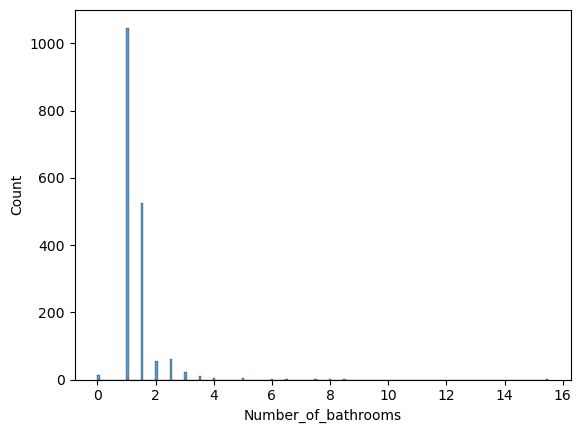

In [39]:
# Histogram plot

sns.histplot(data=listings['Number_of_bathrooms'])

In [40]:
# replacing 0 values with Median value

listings['Number_of_bathrooms'].replace([0], 1, inplace=True)

In [41]:
listings['Number_of_bathrooms'].unique()

array([ 1. ,  2.5,  2. ,  1.5,  3. ,  3.5,  8.5,  5. ,  4. ,  6.5, 15.5,
        8. ,  6. ,  7.5])

In [42]:
# Now applying floor function to change the decimal numbers to nearest whole number 

listings['Number_of_bathrooms']=listings['Number_of_bathrooms'].apply(np.floor)
listings['Number_of_bathrooms']

0       1.0
1       2.0
2       1.0
3       2.0
4       1.0
       ... 
1744    1.0
1745    1.0
1746    1.0
1747    7.0
1748    1.0
Name: Number_of_bathrooms, Length: 1749, dtype: float64

In [43]:
listings['amenities_element_count'] = [len(lst) for lst in listings['amenities']]
print(listings[['amenities_element_count', 'amenities']])

      amenities_element_count  \
0                         591   
1                         823   
2                         784   
3                         197   
4                         328   
...                       ...   
1744                      715   
1745                      158   
1746                      450   
1747                      609   
1748                      678   

                                              amenities  
0     ["Kitchen", "Smoke alarm", "Hair dryer", "Keyp...  
1     ["Refrigerator", "Elevator", "Paid street park...  
2     ["Paid street parking off premises", "Kitchen"...  
3     ["Fire extinguisher", "Backyard", "Long term s...  
4     ["Refrigerator", "Kitchen", "Smoke alarm", "Sh...  
...                                                 ...  
1744  ["Refrigerator", "Elevator", "Yamaha RX-A550 s...  
1745  ["Hot water", "Long term stays allowed", "Kitc...  
1746  ["Kitchen", "Smoke alarm", "Outdoor furniture"...  
1747  ["Refrigerator", 

In [44]:
listings.dtypes

listing_id                   int64
latitude                   float64
longitude                  float64
property_type               object
room_type                   object
accomodates                  int64
bedrooms                   float64
beds                       float64
amenities                   object
host_id                      int64
Number_of_bathrooms        float64
amenities_element_count      int64
dtype: object

In [45]:
listings.isna().sum()

listing_id                 0
latitude                   0
longitude                  0
property_type              0
room_type                  0
accomodates                0
bedrooms                   0
beds                       0
amenities                  0
host_id                    0
Number_of_bathrooms        0
amenities_element_count    0
dtype: int64

In [46]:
reviews["date"]=reviews["date"].str[0:10]
reviews

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03,7984251,Marcel,This is a very nice appartement. We really lik...
...,...,...,...,...,...,...
62982,62983,53538847,2021-12-05,48076753,Serge,The place as it's shown in the photos. Great l...
62983,62984,53600839,2021-12-12,6635741,Dániel,The spacious apartment is idyllically located ...
62984,62985,53819793,2021-12-21,247934155,Gijs,It was great
62985,62986,53825194,2021-12-19,361042882,Siarhei,Flor es muy atenta y me ayudo mucho entrando a...


In [47]:
reviews.isna().sum()

review_id         0
listing_id        0
date              0
reviewer_id       0
reviewer_name     0
comments         64
dtype: int64

In [48]:
reviews=reviews.drop(["comments"],axis=1)
reviews

,review_id,listing_id,date,reviewer_id,reviewer_name
0,1,50904,2015-05-06,19482395,Jihae
1,2,50904,2021-10-10,333559,Emilie
2,3,116134,2012-03-05,928644,Aurélien
3,4,116134,2012-05-25,231288,Gail
4,5,116134,2013-09-03,7984251,Marcel
...,...,...,...,...,...
62982,62983,53538847,2021-12-05,48076753,Serge
62983,62984,53600839,2021-12-12,6635741,Dániel
62984,62985,53819793,2021-12-21,247934155,Gijs
62985,62986,53825194,2021-12-19,361042882,Siarhei


In [49]:
reviews[reviews.duplicated()]

,review_id,listing_id,date,reviewer_id,reviewer_name


In [50]:
# checking for the distinct listings ID and counting their values

listings_result_df = reviews.groupby('listing_id').size().reset_index(name='listing_id_count')


In [51]:
listings_result_df

,listing_id,listing_id_count
0,50904,2
1,116134,120
2,218916,28
3,224333,3
4,224682,349
...,...,...
1520,53522234,2
1521,53538847,1
1522,53600839,1
1523,53819793,1


In [52]:
# Let's join the datasets based on common columns

print("Columns of calendar DataFrame:")
print(calendar.columns)
print()

print("Columns of Hosts DataFrame:")
print(host.columns)
print()

print("Columns of listings DataFrame:")
print(listings.columns)
print()

print("Columns of listings_result_df DataFrame:")
print(listings_result_df.columns)
print()

print("Columns of reviews DataFrame:")
print(reviews.columns)


Columns of calendar DataFrame:
Index(['calender_id', 'listing_id', 'date', 'available', 'price',
       'adjusted_price', 'minimum_nights', 'maximum_nights'],
      dtype='object')

Columns of Hosts DataFrame:
Index(['host_id', 'host_name', 'host_since', 'host_location'], dtype='object')

Columns of listings DataFrame:
Index(['listing_id', 'latitude', 'longitude', 'property_type', 'room_type',
       'accomodates', 'bedrooms', 'beds', 'amenities', 'host_id',
       'Number_of_bathrooms', 'amenities_element_count'],
      dtype='object')

Columns of listings_result_df DataFrame:
Index(['listing_id', 'listing_id_count'], dtype='object')

Columns of reviews DataFrame:
Index(['review_id', 'listing_id', 'date', 'reviewer_id', 'reviewer_name'], dtype='object')


In [53]:
merge1 = calendar.merge(listings, on='listing_id', how='inner')
merge1

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,latitude,longitude,property_type,room_type,accomodates,bedrooms,beds,amenities,host_id,Number_of_bathrooms,amenities_element_count
0,1,40334325,2022-08-03,0,56.0,56.0,3,5,51.209890,4.422980,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266
1,2109,40334325,2022-02-14,1,56.0,56.0,3,5,51.209890,4.422980,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266
2,3617,40334325,2022-04-26,0,56.0,56.0,3,5,51.209890,4.422980,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266
3,5560,40334325,2022-04-08,0,56.0,56.0,3,5,51.209890,4.422980,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266
4,8188,40334325,2022-04-11,0,56.0,56.0,3,5,51.209890,4.422980,Entire rental unit,Entire home/apt,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292267,309825,36031281,2022-01-17,1,144.0,144.0,2,1125,51.214190,4.400130,Entire serviced apartment,Entire home/apt,4,2.0,3.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",270964935,1.0,924
292268,129624,813969,2022-01-13,0,199.0,199.0,1,1125,51.213470,4.391250,Entire rental unit,Entire home/apt,6,2.0,3.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",4277604,1.0,825
292269,303431,813969,2022-01-12,0,199.0,199.0,1,1125,51.213470,4.391250,Entire rental unit,Entire home/apt,6,2.0,3.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",4277604,1.0,825
292270,243373,52896982,2022-08-02,1,190.0,190.0,1,1000,51.209221,4.395305,Entire loft,Entire home/apt,4,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Kitchen"", ""Smoke...",428245943,1.0,846


In [54]:
merge2 = merge1.merge(host, on='host_id', how='inner')
merge2

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,latitude,longitude,...,accomodates,bedrooms,beds,amenities,host_id,Number_of_bathrooms,amenities_element_count,host_name,host_since,host_location
0,1,40334325,2022-08-03,0,56.0,56.0,3,5,51.20989,4.42298,...,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266,Xander,2019-11-23,BE
1,2109,40334325,2022-02-14,1,56.0,56.0,3,5,51.20989,4.42298,...,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266,Xander,2019-11-23,BE
2,3617,40334325,2022-04-26,0,56.0,56.0,3,5,51.20989,4.42298,...,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266,Xander,2019-11-23,BE
3,5560,40334325,2022-04-08,0,56.0,56.0,3,5,51.20989,4.42298,...,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266,Xander,2019-11-23,BE
4,8188,40334325,2022-04-11,0,56.0,56.0,3,5,51.20989,4.42298,...,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266,Xander,2019-11-23,BE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292267,207771,53107460,2022-01-08,0,100.0,150.0,2,365,51.21674,4.41422,...,4,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Shower gel"", ""Ki...",267848896,1.0,680,Dietrich,2019-06-11,BE
292268,244771,53107460,2022-01-02,1,99.0,149.0,2,365,51.21674,4.41422,...,4,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Shower gel"", ""Ki...",267848896,1.0,680,Dietrich,2019-06-11,BE
292269,307525,53107460,2022-01-31,1,150.0,225.0,2,365,51.21674,4.41422,...,4,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Shower gel"", ""Ki...",267848896,1.0,680,Dietrich,2019-06-11,BE
292270,129624,813969,2022-01-13,0,199.0,199.0,1,1125,51.21347,4.39125,...,6,2.0,3.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",4277604,1.0,825,Sarah,2012-11-29,"Antwerp, Flanders, Belgium"


In [55]:
Final_merge = merge1.merge(host, on='host_id', how='inner').merge(listings_result_df, on='listing_id', how='inner')
Final_merge

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,latitude,longitude,...,bedrooms,beds,amenities,host_id,Number_of_bathrooms,amenities_element_count,host_name,host_since,host_location,listing_id_count
0,1,40334325,2022-08-03,0,56.0,56.0,3,5,51.20989,4.42298,...,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266,Xander,2019-11-23,BE,1
1,2109,40334325,2022-02-14,1,56.0,56.0,3,5,51.20989,4.42298,...,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266,Xander,2019-11-23,BE,1
2,3617,40334325,2022-04-26,0,56.0,56.0,3,5,51.20989,4.42298,...,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266,Xander,2019-11-23,BE,1
3,5560,40334325,2022-04-08,0,56.0,56.0,3,5,51.20989,4.42298,...,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266,Xander,2019-11-23,BE,1
4,8188,40334325,2022-04-11,0,56.0,56.0,3,5,51.20989,4.42298,...,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587,1.0,266,Xander,2019-11-23,BE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257327,311924,35379310,2022-03-28,1,60.0,60.0,1,1125,51.21017,4.45431,...,1.0,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,1.0,161,Leudimar,2019-06-02,BE,1
257328,312558,35379310,2022-05-23,1,60.0,60.0,1,1125,51.21017,4.45431,...,1.0,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,1.0,161,Leudimar,2019-06-02,BE,1
257329,313643,35379310,2022-10-15,1,60.0,60.0,1,1125,51.21017,4.45431,...,1.0,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",265837980,1.0,161,Leudimar,2019-06-02,BE,1
257330,129624,813969,2022-01-13,0,199.0,199.0,1,1125,51.21347,4.39125,...,2.0,3.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",4277604,1.0,825,Sarah,2012-11-29,"Antwerp, Flanders, Belgium",85


In [56]:
Final_merge.isna().sum()

calender_id                0
listing_id                 0
date                       0
available                  0
price                      0
adjusted_price             0
minimum_nights             0
maximum_nights             0
latitude                   0
longitude                  0
property_type              0
room_type                  0
accomodates                0
bedrooms                   0
beds                       0
amenities                  0
host_id                    0
Number_of_bathrooms        0
amenities_element_count    0
host_name                  0
host_since                 0
host_location              0
listing_id_count           0
dtype: int64

In [57]:
Final_merge.dtypes

calender_id                  int64
listing_id                   int64
date                        object
available                    int64
price                      float64
adjusted_price             float64
minimum_nights               int64
maximum_nights               int64
latitude                   float64
longitude                  float64
property_type               object
room_type                   object
accomodates                  int64
bedrooms                   float64
beds                       float64
amenities                   object
host_id                      int64
Number_of_bathrooms        float64
amenities_element_count      int64
host_name                   object
host_since                  object
host_location               object
listing_id_count             int64
dtype: object

In [58]:
Final_merge[['price','adjusted_price','minimum_nights','maximum_nights','accomodates','bedrooms','beds']].describe()

,price,adjusted_price,minimum_nights,maximum_nights,accomodates,bedrooms,beds
count,257332.000000,257332.000000,257332.000000,257332.000000,257332.000000,257332.000000,257332.000000
mean,80.555504,80.422781,3.953923,812.742523,3.563199,1.355626,2.011371
std,35.823001,35.681962,11.195840,527.084219,2.572925,0.693119,1.482808
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,55.000000,55.000000,1.000000,365.000000,2.000000,1.000000,1.000000
50%,75.000000,74.000000,2.000000,1125.000000,2.000000,1.000000,2.000000
75%,99.000000,99.000000,2.000000,1125.000000,4.000000,2.000000,2.000000
max,199.000000,241.000000,300.000000,9999.000000,16.000000,11.000000,20.000000


In [59]:
Final_merge[['price','adjusted_price','minimum_nights','maximum_nights','accomodates','bedrooms','beds']].quantile([0.25,0.5,0.75,0.9,0.95])

,price,adjusted_price,minimum_nights,maximum_nights,accomodates,bedrooms,beds
0.25,55.0,55.0,1.0,365.0,2.0,1.0,1.0
0.50,75.0,74.0,2.0,1125.0,2.0,1.0,2.0
0.75,99.0,99.0,2.0,1125.0,4.0,2.0,2.0
0.90,132.0,131.0,7.0,1125.0,6.0,2.0,4.0
0.95,150.0,150.0,14.0,1125.0,10.0,2.0,5.0


In [60]:
# Let's check for correlation

Final_merge[['available', 'price',
       'minimum_nights', 'maximum_nights', 'accomodates', 'bedrooms',
       'beds', 'Number_of_bathrooms','amenities_element_count']].corr()

,available,price,minimum_nights,maximum_nights,accomodates,bedrooms,beds,Number_of_bathrooms,amenities_element_count
available,1.000000,0.128402,0.019541,-0.066880,0.228053,0.069580,0.180958,0.035636,0.120637
price,0.128402,1.000000,-0.059240,0.035515,0.193417,0.277505,0.179022,0.079501,0.143567
minimum_nights,0.019541,-0.059240,1.000000,0.022821,-0.065832,0.031708,-0.014606,0.000808,0.004818
maximum_nights,-0.066880,0.035515,0.022821,1.000000,-0.208164,-0.003282,-0.124360,0.004079,0.003098
accomodates,0.228053,0.193417,-0.065832,-0.208164,1.000000,0.576568,0.786028,0.219589,0.224506
bedrooms,0.069580,0.277505,0.031708,-0.003282,0.576568,1.000000,0.718769,0.302277,0.126679
beds,0.180958,0.179022,-0.014606,-0.124360,0.786028,0.718769,1.000000,0.226643,0.171347
Number_of_bathrooms,0.035636,0.079501,0.000808,0.004079,0.219589,0.302277,0.226643,1.000000,0.099599
amenities_element_count,0.120637,0.143567,0.004818,0.003098,0.224506,0.126679,0.171347,0.099599,1.000000


In [61]:
# Correlation doesn't show any strong relationship thus making correlation matrix insignificant

In [62]:
df = Final_merge

In [63]:
# Let's drop unneccessary datasets

df=df.drop(df[['calender_id','host_id']],axis=1)
df

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,latitude,longitude,property_type,...,accomodates,bedrooms,beds,amenities,Number_of_bathrooms,amenities_element_count,host_name,host_since,host_location,listing_id_count
0,40334325,2022-08-03,0,56.0,56.0,3,5,51.20989,4.42298,Entire rental unit,...,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",1.0,266,Xander,2019-11-23,BE,1
1,40334325,2022-02-14,1,56.0,56.0,3,5,51.20989,4.42298,Entire rental unit,...,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",1.0,266,Xander,2019-11-23,BE,1
2,40334325,2022-04-26,0,56.0,56.0,3,5,51.20989,4.42298,Entire rental unit,...,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",1.0,266,Xander,2019-11-23,BE,1
3,40334325,2022-04-08,0,56.0,56.0,3,5,51.20989,4.42298,Entire rental unit,...,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",1.0,266,Xander,2019-11-23,BE,1
4,40334325,2022-04-11,0,56.0,56.0,3,5,51.20989,4.42298,Entire rental unit,...,2,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",1.0,266,Xander,2019-11-23,BE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257327,35379310,2022-03-28,1,60.0,60.0,1,1125,51.21017,4.45431,Private room in rental unit,...,1,1.0,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",1.0,161,Leudimar,2019-06-02,BE,1
257328,35379310,2022-05-23,1,60.0,60.0,1,1125,51.21017,4.45431,Private room in rental unit,...,1,1.0,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",1.0,161,Leudimar,2019-06-02,BE,1
257329,35379310,2022-10-15,1,60.0,60.0,1,1125,51.21017,4.45431,Private room in rental unit,...,1,1.0,1.0,"[""Hot water"", ""Fire extinguisher"", ""Long term ...",1.0,161,Leudimar,2019-06-02,BE,1
257330,813969,2022-01-13,0,199.0,199.0,1,1125,51.21347,4.39125,Entire rental unit,...,6,2.0,3.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",1.0,825,Sarah,2012-11-29,"Antwerp, Flanders, Belgium",85


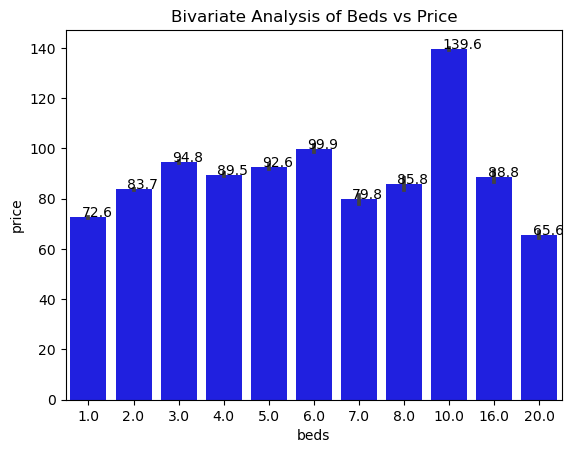

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
ax4 = sns.barplot(data=df, x='beds', y='price',color='blue')

# Annotate each bar with its height
for p in ax4.patches:
    ax4.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Set title and show plot
plt.title('Bivariate Analysis of Beds vs Price')
plt.show()

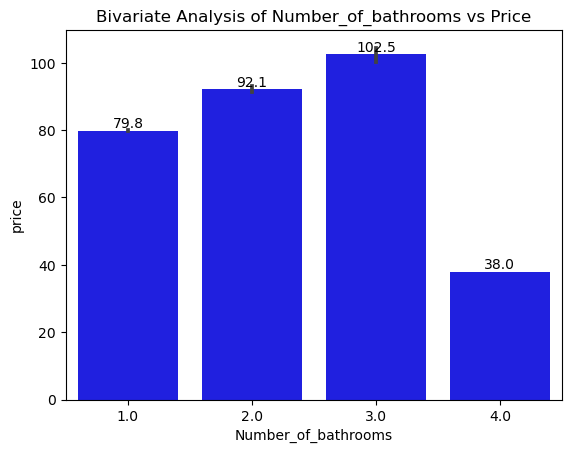

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
ax5 = sns.barplot(data=df, x='Number_of_bathrooms', y='price',color='blue')

# Annotate each bar with its height
for p in ax5.patches:
    ax5.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set title and show plot
plt.title('Bivariate Analysis of Number_of_bathrooms vs Price')
plt.show()


<Axes: xlabel='Number_of_bathrooms', ylabel='price'>

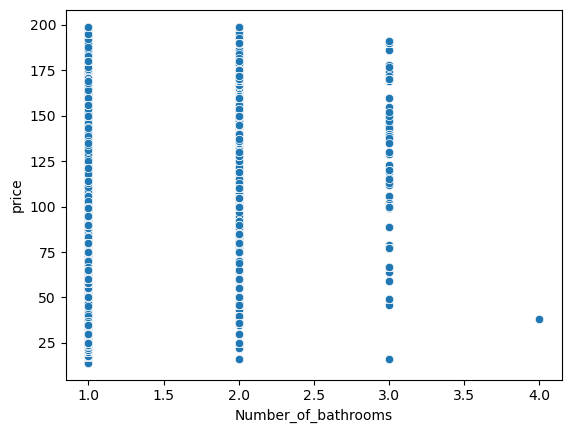

In [66]:
sns.scatterplot(data=df,x='Number_of_bathrooms',y='price')

In [67]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df['bedrooms'], df['price'], test_size=0.3, random_state=23)

import numpy as np

# Reshape x_train and x_test arrays
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

# Print the reshaped arrays
print("x_train:")
print(x_train)
print("\nx_test:")
print(x_test)


x_train:
[[1.]
 [1.]
 [1.]
 ...
 [2.]
 [1.]
 [1.]]

x_test:
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [68]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(x_train, y_train)


LinearRegression()

In [69]:
y_pred_train=lr.predict(x_train)
y_pred_train

array([75.45568245, 75.45568245, 75.45568245, ..., 89.59843109,
       75.45568245, 75.45568245])

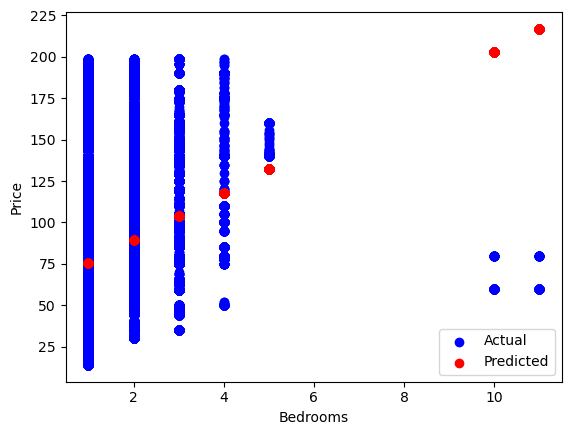

In [70]:
import matplotlib.pyplot as plt

# Create a scatter plot of the training data
plt.scatter(x_train, y_train, label='Actual', color='blue')

# Overlay the predicted values on the same plot
plt.scatter(x_train, y_pred_train, label='Predicted', color='red')

# Add labels and legend
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()


In [71]:
y_pred_test=lr.predict(x_test)
y_pred_test

array([75.45568245, 75.45568245, 75.45568245, ..., 75.45568245,
       75.45568245, 75.45568245])

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the target variable for the test set
y_pred_test = lr.predict(x_test)

# Compute R2 score on the test set
r2_score = lr.score(x_test, y_test)

# Compute Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred_test)

# Print the R2 score and MSE
print("R-squared (R2) Score on Test Set:", r2_score)
print("Mean Squared Error (MSE) on Test Set:", mse)


R-squared (R2) Score on Test Set: 0.07883416071976823
Mean Squared Error (MSE) on Test Set: 1186.0214645712551


In [73]:
x1 = df['amenities_element_count']
y1 = df['price']

In [74]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=23)

# Reshape the training feature into a 2D array with a single column
x1_train = np.array(x1_train).reshape(-1, 1)

# Print the reshaped array
print("x1_train:")
print(x1_train)


x1_train:
[[678]
 [532]
 [682]
 ...
 [606]
 [329]
 [768]]


In [75]:
import numpy as np

# Reshape the testing feature into a 2D array with a single column
x1_test = np.array(x1_test).reshape(-1, 1)

# Print the reshaped array
print("x1_test:")
print(x1_test)


x1_test:
[[348]
 [432]
 [450]
 ...
 [202]
 [415]
 [381]]


In [76]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(x1_train, y1_train)


LinearRegression()

In [77]:
# Predict the target variable for the training data
y1_pred_train = lr.predict(x1_train)

# Print the predicted values
print(y1_pred_train)


[85.61222667 82.13784675 85.70741516 ... 83.89883383 77.30703083
 87.75396771]


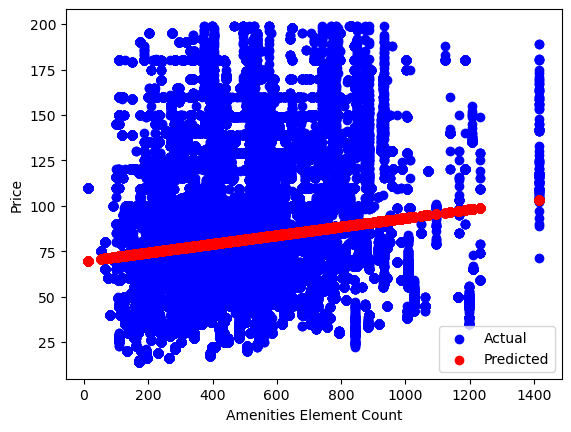

In [78]:
import matplotlib.pyplot as plt

# Create a scatter plot of the training data
plt.scatter(x1_train, y1_train, label='Actual', color='blue')

# Overlay the predicted values on the same plot
plt.scatter(x1_train, y1_pred_train, label='Predicted', color='red')

# Add labels and legend
plt.xlabel('Amenities Element Count')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()


In [79]:
# Calculate R2 score on the test set using x_test and y1_test
r2_score_percentage = lr.score(x_test, y1_test)

# Print the R2 score
print("R-squared (R2) Score on Test Set:", r2_score_percentage)

from sklearn.metrics import mean_squared_error

# Predict the target variable for the test set
y_pred_test = lr.predict(x_test)

# Compute Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y1_test, y_pred_test)

# Print the MSE
print("Mean Squared Error (MSE) on Test Set:", mse)


R-squared (R2) Score on Test Set: -0.09614735962400944
Mean Squared Error (MSE) on Test Set: 1411.3140559608694


In [80]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(df['amenities_element_count'], df['price'], test_size=0.3, random_state=23)

# Split training set into training and validation sets (60% train, 40% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=23)

# Print the sizes of each set
print("Training set size:", len(x_train))
print("Validation set size:", len(x_val))
print("Test set size:", len(x_test))


Training set size: 108079
Validation set size: 72053
Test set size: 77200


In [81]:
x2=df['Number_of_bathrooms']
y2=df['price']

In [82]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=23)
x2_train=np.array(x2_train).reshape(-1,1)
x2_train

array([[1.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [1.]])

In [83]:
x2_test=np.array(x2_test).reshape(-1,1)
x2_test

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [84]:
lr.fit(x2_train,y2_train)

LinearRegression()

In [85]:
y2_pred_train=lr.predict(x2_train)
y2_pred_train

array([79.84799603, 79.84799603, 79.84799603, ..., 89.66422779,
       79.84799603, 79.84799603])

Text(0, 0.5, 'Price')

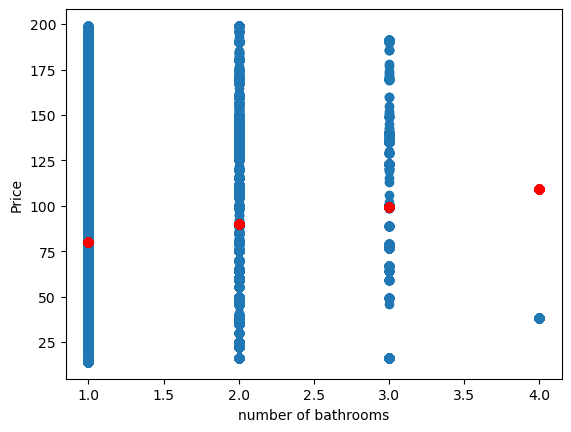

In [86]:
plt.scatter(x2_train,y2_train)
plt.scatter(x2_train,y2_pred_train,color='red')
plt.xlabel('number of bathrooms')
plt.ylabel('Price')


Text(0, 0.5, 'Price')

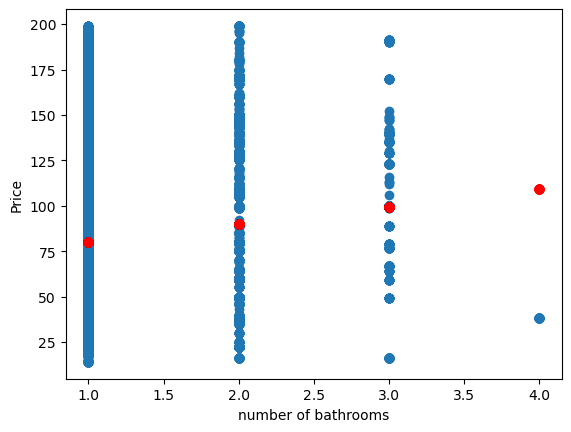

In [87]:
y2_pred_test=lr.predict(x2_test)
plt.scatter(x2_test,y2_test)
plt.scatter(x2_test,y2_pred_test,color='red')
plt.xlabel('number of bathrooms')
plt.ylabel('Price')

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the target variable for the test set
y_pred_test = lr.predict(x2_test)

# Compute R2 score on the test set
r2 = r2_score(y2_test, y_pred_test)

# Compute Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y2_test, y_pred_test)

# Print the R2 score and MSE
print("R-squared (R2) Score on Test Set:", r2)
print("Mean Squared Error (MSE) on Test Set:", mse)


R-squared (R2) Score on Test Set: 0.0065881341655756875
Mean Squared Error (MSE) on Test Set: 1279.0398273561898


#### We can conclude that we are unable to predict the price properly using Linear Regression since R2 score is too low.

#### Regression Trees

In [89]:
df.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights', 'latitude', 'longitude',
       'property_type', 'room_type', 'accomodates', 'bedrooms', 'beds',
       'amenities', 'Number_of_bathrooms', 'amenities_element_count',
       'host_name', 'host_since', 'host_location', 'listing_id_count'],
      dtype='object')

In [90]:
# Let's implement label encoding in the categorical columns 

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
encoded_labels = label_encoder.fit_transform(df['property_type'])

print("Encoded labels:", encoded_labels)
df['property_type_encoded_label']=encoded_labels


Encoded labels: [ 6  6  6 ... 21  6  6]


In [91]:
df['property_type_encoded_label']

0          6
1          6
2          6
3          6
4          6
          ..
257327    21
257328    21
257329    21
257330     6
257331     6
Name: property_type_encoded_label, Length: 257332, dtype: int32

In [92]:
encoded_labels_room_type = label_encoder.fit_transform(df['room_type'])

print("Encoded labels:", encoded_labels_room_type)
df['room_type_encoded_label']=encoded_labels_room_type

Encoded labels: [0 0 0 ... 2 0 0]


In [93]:
df['room_type_encoded_label']

0         0
1         0
2         0
3         0
4         0
         ..
257327    2
257328    2
257329    2
257330    0
257331    0
Name: room_type_encoded_label, Length: 257332, dtype: int32

In [94]:
encoded_labels_Host_name = label_encoder.fit_transform(df['host_name'])
print("Encoded labels:", encoded_labels_Host_name)
df['encoded_labels_Host_name']=encoded_labels_Host_name
print(df['encoded_labels_Host_name'])

Encoded labels: [628 628 628 ... 345 530 530]
0         628
1         628
2         628
3         628
4         628
         ... 
257327    345
257328    345
257329    345
257330    530
257331    530
Name: encoded_labels_Host_name, Length: 257332, dtype: int32


In [95]:
encoded_labels_host_location = label_encoder.fit_transform(df['host_location'])
print("Encoded labels:", encoded_labels_host_location)
df['encoded_labels_host_location']=encoded_labels_host_location
print(df['encoded_labels_host_location'])

Encoded labels: [16 16 16 ... 16  7  7]
0         16
1         16
2         16
3         16
4         16
          ..
257327    16
257328    16
257329    16
257330     7
257331     7
Name: encoded_labels_host_location, Length: 257332, dtype: int32


In [96]:
df.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights', 'latitude', 'longitude',
       'property_type', 'room_type', 'accomodates', 'bedrooms', 'beds',
       'amenities', 'Number_of_bathrooms', 'amenities_element_count',
       'host_name', 'host_since', 'host_location', 'listing_id_count',
       'property_type_encoded_label', 'room_type_encoded_label',
       'encoded_labels_Host_name', 'encoded_labels_host_location'],
      dtype='object')

In [97]:
# Hence, two new encoded columns are added
# Let's drop the non encoded string columns

df = df.drop(df[['date','property_type','host_name','host_location','host_since','amenities','room_type']],axis=1)
df.columns

Index(['listing_id', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights', 'latitude', 'longitude', 'accomodates', 'bedrooms',
       'beds', 'Number_of_bathrooms', 'amenities_element_count',
       'listing_id_count', 'property_type_encoded_label',
       'room_type_encoded_label', 'encoded_labels_Host_name',
       'encoded_labels_host_location'],
      dtype='object')

In [98]:
# Let's apply Regression Trees

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X=df.drop(df[['price']],axis=1)
y=df['price']

# Split data into train/test/validation sets (85% train, 15% test/validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.15, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create and train Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_val_pred = model.predict(X_val)

# Evaluate model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
val_r2 = r2_score(y_val, y_val_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

print("Train R2 Score:", train_r2)
print("Test R2 Score:", test_r2)
print("Validation R2 Score:", val_r2)

print("\nTrain MSE:", train_mse)
print("Test MSE:", test_mse)
print("Validation MSE:", val_mse)


Train R2 Score: 0.9999863872292009
Test R2 Score: 0.9997037606177375
Validation R2 Score: 0.9992854444274621

Train MSE: 0.01743820334402705
Test MSE: 0.38594396305595075
Validation MSE: 0.9212916851424678


In [99]:
# Let's apply Random Forest 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X=df.drop(df[['price']],axis=1)
y=df['price']

# Split data into train/test/validation sets (85% train, 15% test/validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.15, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Random Forest Regressor
print("Random Forest Regressor:")
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_y_train_pred = rf_model.predict(X_train)
rf_y_test_pred = rf_model.predict(X_test)
rf_y_val_pred = rf_model.predict(X_val)

# Evaluate model
rf_train_r2 = r2_score(y_train, rf_y_train_pred)
rf_test_r2 = r2_score(y_test, rf_y_test_pred)
rf_val_r2 = r2_score(y_val, rf_y_val_pred)

rf_train_mse = mean_squared_error(y_train, rf_y_train_pred)
rf_test_mse = mean_squared_error(y_test, rf_y_test_pred)
rf_val_mse = mean_squared_error(y_val, rf_y_val_pred)

print("Train R2 Score:", rf_train_r2)
print("Test R2 Score:", rf_test_r2)
print("Validation R2 Score:", rf_val_r2)

print("\nTrain MSE:", rf_train_mse)
print("Test MSE:", rf_test_mse)
print("Validation MSE:", rf_val_mse)

Random Forest Regressor:
Train R2 Score: 0.9999644379407915
Test R2 Score: 0.999699735126467
Validation R2 Score: 0.9995859839588553

Train MSE: 0.045555635143069984
Test MSE: 0.39118841786911035
Validation MSE: 0.5337996803628338


In [100]:
# Let's apply Gradient Boosting Regressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_y_train_pred = gb_model.predict(X_train)
gb_y_test_pred = gb_model.predict(X_test)
gb_y_val_pred = gb_model.predict(X_val)

# Evaluate model
gb_train_r2 = r2_score(y_train, gb_y_train_pred)
gb_test_r2 = r2_score(y_test, gb_y_test_pred)
gb_val_r2 = r2_score(y_val, gb_y_val_pred)

gb_train_mse = mean_squared_error(y_train, gb_y_train_pred)
gb_test_mse = mean_squared_error(y_test, gb_y_test_pred)
gb_val_mse = mean_squared_error(y_val, gb_y_val_pred)

print("Train R2 Score:", gb_train_r2)
print("Test R2 Score:", gb_test_r2)
print("Validation R2 Score:", gb_val_r2)

print("\nTrain MSE:", gb_train_mse)
print("Test MSE:", gb_test_mse)
print("Validation MSE:", gb_val_mse)

Train R2 Score: 0.9991982929439134
Test R2 Score: 0.9991390200272136
Validation R2 Score: 0.9987371213248586

Train MSE: 1.027001105998212
Test MSE: 1.1216942874748632
Validation MSE: 1.6282563140879953


In [101]:
df.corr()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,latitude,longitude,accomodates,bedrooms,beds,Number_of_bathrooms,amenities_element_count,listing_id_count,property_type_encoded_label,room_type_encoded_label,encoded_labels_Host_name,encoded_labels_host_location
listing_id,1.000000,0.034555,0.004907,0.003953,-0.098320,-0.124282,0.040932,-0.052466,0.153956,-0.063583,0.045248,-0.103079,0.101570,-0.443130,-0.113706,-0.083385,0.064408,0.087834
available,0.034555,1.000000,0.128402,0.126983,0.019541,-0.066880,0.031035,-0.139599,0.228053,0.069580,0.180958,0.035636,0.120637,0.028728,-0.002952,-0.015779,0.037159,-0.031130
price,0.004907,0.128402,1.000000,0.999179,-0.059240,0.035515,0.086603,-0.163101,0.193417,0.277505,0.179022,0.079501,0.143567,-0.061486,-0.255291,-0.327689,0.028564,0.058065
adjusted_price,0.003953,0.126983,0.999179,1.000000,-0.058674,0.035083,0.086963,-0.162614,0.195522,0.279313,0.181111,0.079205,0.141052,-0.061574,-0.256598,-0.329016,0.027717,0.057377
minimum_nights,-0.098320,0.019541,-0.059240,-0.058674,1.000000,0.022821,-0.018390,-0.016226,-0.065832,0.031708,-0.014606,0.000808,0.004818,-0.047567,-0.078795,-0.087926,0.074088,0.003644
maximum_nights,-0.124282,-0.066880,0.035515,0.035083,0.022821,1.000000,0.033144,0.034817,-0.208164,-0.003282,-0.124360,0.004079,0.003098,0.205839,-0.003458,-0.014024,-0.026853,0.108598
latitude,0.040932,0.031035,0.086603,0.086963,-0.018390,0.033144,1.000000,0.133659,0.151017,0.066160,0.100118,0.080521,0.046129,0.128149,-0.085885,-0.097310,0.060902,0.045402
longitude,-0.052466,-0.139599,-0.163101,-0.162614,-0.016226,0.034817,0.133659,1.000000,-0.128493,-0.047215,-0.092888,0.039889,0.003176,-0.000323,0.101404,0.122785,-0.024549,-0.075885
accomodates,0.153956,0.228053,0.193417,0.195522,-0.065832,-0.208164,0.151017,-0.128493,1.000000,0.576568,0.786028,0.219589,0.224506,-0.012027,-0.252568,-0.266914,0.073333,-0.072031
bedrooms,-0.063583,0.069580,0.277505,0.279313,0.031708,-0.003282,0.066160,-0.047215,0.576568,1.000000,0.718769,0.302277,0.126679,0.018252,-0.147685,-0.154699,0.030961,0.025803


#### Ranked by correlation strength, the top five predictors are: 1. bedroom count, 2. accommodation capacity, 3. bed count, 4. Amenities, 5. availability status. These features demonstrate robust correlations with the target variable, implying their substantial predictive influence within the model.

#### Overall, these top predictors positively influence the response variable, indicating that properties with more bedrooms, accommodation capacity, bed count, and amenities tend to be associated with higher prices, greater demand, or increased desirability.